In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
import sparsetools as sp
from matplotlib.colors import LogNorm
import os

In [13]:
#obs = sp.profile('../../ibis_alma3_obs.nc').extractPix(x1=320,y1=320)
#xi_fit = sp.profile('../band3/alma/alma_fit_2_redux.nc')
#xi_mod = sp.model('../band3/alma/alma_mod_2_redux.nc')
#tau_fit = sp.profile('../band3/alma/alma_fit_2_ltau.nc')
#tau_mod = sp.model('../band3/alma/alma_mod_2_ltau.nc')
obs = sp.profile('../../ibis_alma3_obs.nc').extractPix(x0=200,x1=201,y1=320)
xi_fit = sp.profile('../band3/alma/alma_fit_2_redux.nc').extractPix(x0=200,x1=201)
xi_mod = sp.model('../band3/alma/alma_mod_2_redux.nc').extract(x0=200,x1=201)
tau_fit = sp.profile('ibis_alma3_col200_fit_2.nc').extractPix(y1=320)
tau_mod = sp.model('ibis_alma3_col200_mod_2.nc').extract(y1=320)

profile::setsize: nx=334, ny=334, nw=208, ns=4, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=1, ny=320, nw=208, ns=4, nt=1
profile::setsize: nx=320, ny=320, nw=208, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=1, ny=320, nw=208, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::extract: x=(200,201), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 1, ny = 320, ndep = 61, nt = 1
profile::setsize: nx=1, ny=334, nw=208, ns=4, nt=1
profile::read: [profiles][wav][weights]
profile::setsize: nx=1, ny=320, nw=208, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1
model::extract: x=(0,1), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 1, ny = 320, ndep = 61, nt = 1


In [10]:
from scipy.interpolate import interp1d
#xi_to_tau = np.zeros((320,320,61))
#tau_to_xi = np.zeros((320,320,61))
#for i in range(320):
#    for j in range(320):
#        xi_to_tau[i,j] = interp1d(xi_mod.ltau[0,i,j],xi_mod.temp[0,i,j],bounds_error=False,\
#                                  fill_value=np.NaN)(tau_mod.ltau[0,i,j])
#        tau_to_xi[i,j] = interp1d(np.log10(tau_mod.pgas[0,i,j]/27400.),tau_mod.temp[0,i,j],bounds_error=False,\
#                                  fill_value=np.NaN)(xi_mod.cmass[0,i,j])
xi_to_tau = np.zeros((320,61))
tau_to_xi = np.zeros((320,61))
for i in range(320):
    xi_to_tau[i] = interp1d(xi_mod.ltau[0,i,0],xi_mod.temp[0,i,0],bounds_error=False,\
                              fill_value=np.NaN)(tau_mod.ltau[0,i,0])
    tau_to_xi[i] = interp1d(np.log10(tau_mod.pgas[0,i,0]/27400.),tau_mod.temp[0,i,0],bounds_error=False,\
                              fill_value=np.NaN)(xi_mod.cmass[0,i,0])

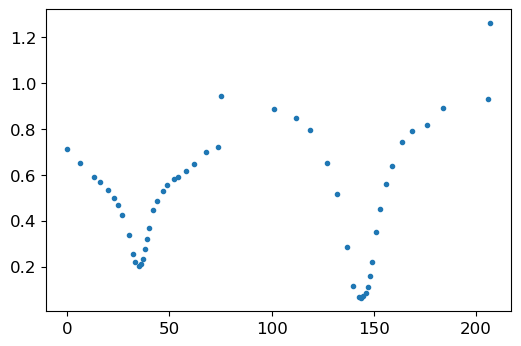

In [11]:
ind = np.where(obs.weights[:,0] < 1)[0]
plt.plot(ind,obs.averageSpectrum()[ind,0],'.')

<ipython-input-14-665fb556438a>:8: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(),\
<ipython-input-14-665fb556438a>:8: RuntimeWarning: invalid value encountered in true_divide
  ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(),\
<ipython-input-14-665fb556438a>:17: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[27:-1],0].ravel(),\
<ipython-input-14-665fb556438a>:17: RuntimeWarning: invalid value encountered in true_divide
  ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[27:-1],0].ravel(),\
<ipython-input-14-665fb556438a>:25: RuntimeWarning: invalid value encountered in true_divide
  ax[1,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(tau_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(

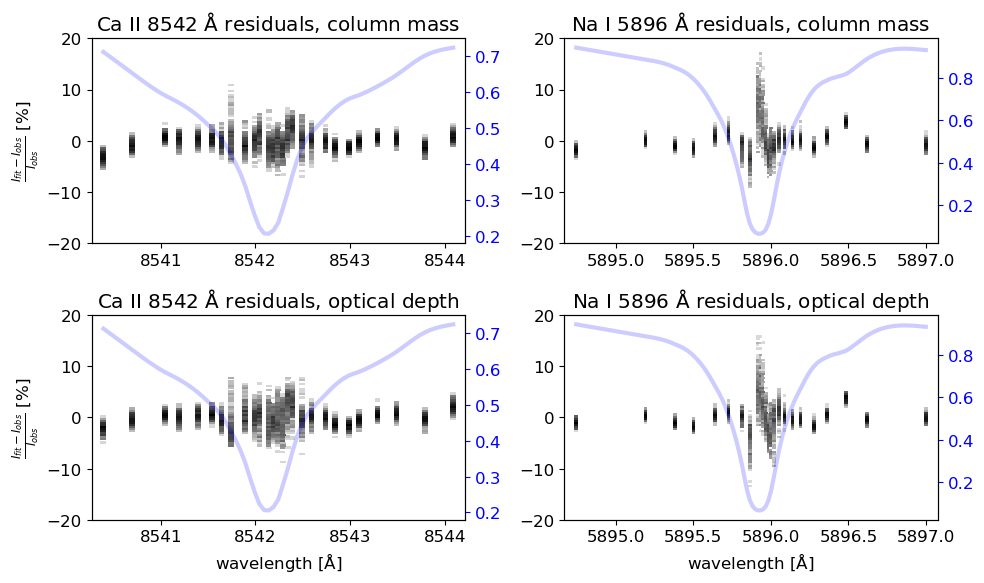

In [14]:
dwc = obs.wav[1] - obs.wav[0]
dwn = obs.wav[76] - obs.wav[75]
w0c = obs.wav[0]
w0n = obs.wav[75]
fig,ax = plt.subplots(2,2,figsize=(10,6))
#ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[:27],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
ax00 = ax[0,0].twinx()
ax00.plot(obs.wav[:75],obs.averageSpectrum()[:75,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax00.tick_params(axis='y',colors='blue')
ax[0,0].set_ylabel(r'$\frac{I_{fit} - I_{obs}}{I_{obs}}$ [%]')
ax[0,0].set_title(r'Ca II 8542 $\mathrm{\AA}$ residuals, column mass')
#ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[27:-1],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[27:-1],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
ax01 = ax[0,1].twinx()
ax01.plot(obs.wav[75:-1],obs.averageSpectrum()[75:-1,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax01.tick_params(axis='y',colors='blue')
ax[0,1].set_title(r'Na I 5896 $\mathrm{\AA}$ residuals, column mass')
#ax[1,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(tau_fit.dat / obs.dat - 1)[0,:,:,ind[:27],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
ax[1,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(tau_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
ax10 = ax[1,0].twinx()
ax10.plot(obs.wav[:75],obs.averageSpectrum()[:75,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax10.tick_params(axis='y',colors='blue')
ax[1,0].set_xlabel(r'wavelength [$\mathrm{\AA}$]')
ax[1,0].set_ylabel(r'$\frac{I_{fit} - I_{obs}}{I_{obs}}$ [%]')
ax[1,0].set_title(r'Ca II 8542 $\mathrm{\AA}$ residuals, optical depth')
#ax[1,1].hist2d(obs.wav[ind[27:-1]].repeat(320**2),100*(tau_fit.dat / obs.dat - 1)[0,:,:,ind[27:-1],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
ax[1,1].hist2d(obs.wav[ind[27:-1]].repeat(320),100*(tau_fit.dat / obs.dat - 1)[0,:,0,ind[27:-1],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
ax11 = ax[1,1].twinx()
ax11.plot(obs.wav[75:-1],obs.averageSpectrum()[75:-1,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax11.tick_params(axis='y',colors='blue')
ax[1,1].set_xlabel(r'wavelength [$\mathrm{\AA}$]')
ax[1,1].set_title(r'Na I 5896 $\mathrm{\AA}$ residuals, optical depth')
plt.tight_layout()
plt.savefig('xi_v_tau_residuals_col200.pdf')

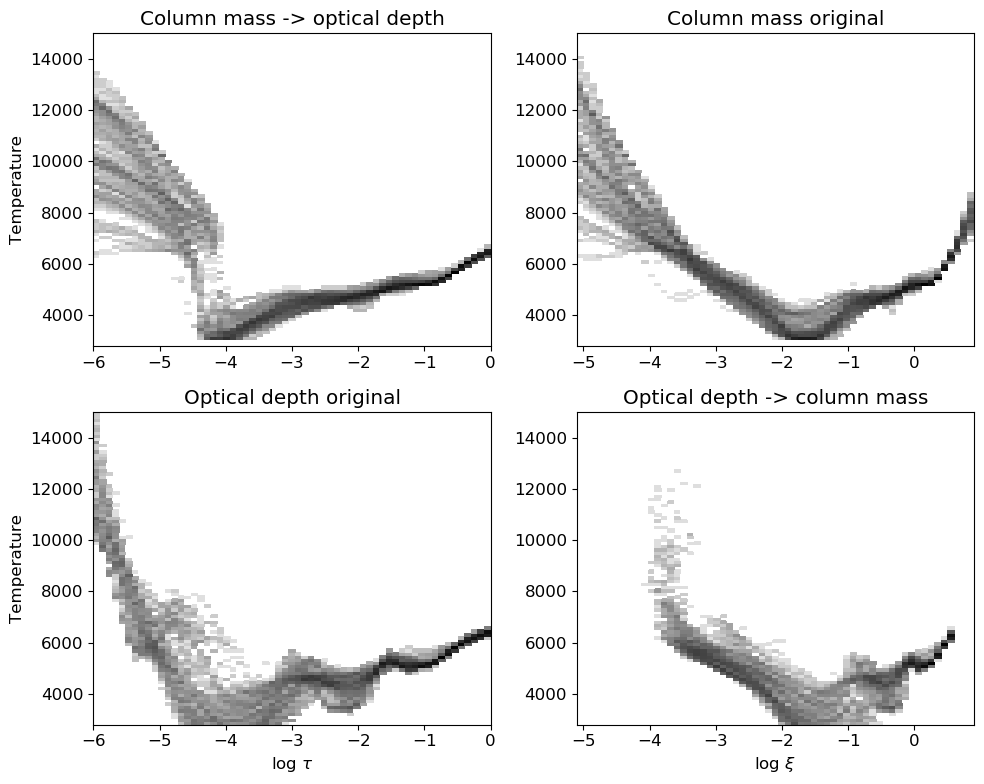

In [15]:
tmin,tmax = 2800,15000
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist2d(tau_mod.ltau.ravel(),xi_to_tau.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.ylabel('Temperature')
plt.title('Column mass -> optical depth')
plt.subplot(222)
plt.hist2d(xi_mod.cmass.ravel(),xi_mod.temp.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.title('Column mass original')
plt.subplot(223)
plt.hist2d(tau_mod.ltau.ravel(),tau_mod.temp.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.xlabel(r'$\log\ \tau$')
plt.ylabel('Temperature')
plt.title('Optical depth original')
plt.subplot(224)
plt.hist2d(xi_mod.cmass.ravel(),tau_to_xi.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.xlabel(r'$\log\ \xi$')
plt.title('Optical depth -> column mass')
plt.tight_layout()
plt.savefig('xi_v_tau_temperatures_col200.pdf')

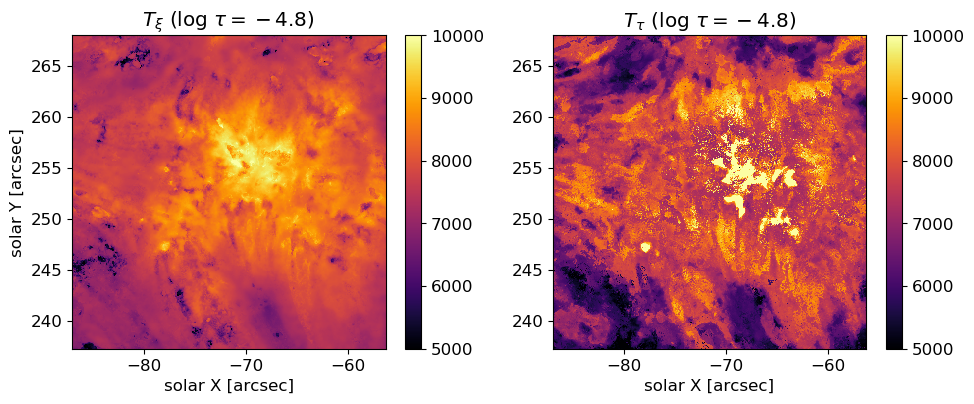

In [8]:
x0,y0 = -87.0, 237.3
w = 0.096*320
x1,y1 = x0+w,y0+w
h = 12
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(xi_to_tau[:,:,h],extent=[x0,x1,y0,y1],cmap='inferno',origin='lower',vmin=5000,vmax=10000)
plt.colorbar()
plt.xlabel('solar X [arcsec]')
plt.ylabel('solar Y [arcsec]')
plt.title(r'$T_{{\xi}}\ (\log\ \tau = {:.1f})$'.format(tau_mod.ltau[0,0,0,h]))
plt.subplot(122)
plt.imshow(tau_mod.temp[0,:,:,h],extent=[x0,x1,y0,y1],cmap='inferno',origin='lower',vmin=5000,vmax=10000)
plt.colorbar()
plt.xlabel('solar X [arcsec]')
plt.title(r'$T_{{\tau}}\ (\log\ \tau = {:.1f})$'.format(tau_mod.ltau[0,0,0,h]))
plt.tight_layout()
plt.savefig('xi_v_tau_maps-4.8.png')